In [103]:
from api import static, gameweek, elements
import pandas as pd

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
static_info = static()
event = static_info.get_events(is_current=True)
players = static_info.get_elements_summary()

In [11]:
gw = gameweek(id=event['id'].values[0])

In [14]:
gw.stats.columns

Index(['id', 'minutes', 'goals_scored', 'assists', 'clean_sheets',
       'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'ict_index', 'starts', 'expected_goals',
       'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'total_points', 'in_dreamteam'],
      dtype='object')

In [41]:
cols = [ 'minutes', 'goals_scored', 'assists', 'clean_sheets',
       'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'ict_index', 'starts', 'expected_goals',
       'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'total_points', 'in_dreamteam']

In [27]:
gk = players.loc[players['element_type'] == 1]
df = players.loc[players['element_type'] == 2]
md = players.loc[players['element_type'] == 3]
fw = players.loc[players['element_type'] == 4]

In [31]:
fw_list = fw.id.tolist()

In [40]:
fw_df = gw.stats[gw.stats['id'].isin(fw_list)]

In [72]:
player_mapping = players[['id','web_name']]

In [75]:
sample = fw_df.loc[fw_df['minutes'] >= 15]

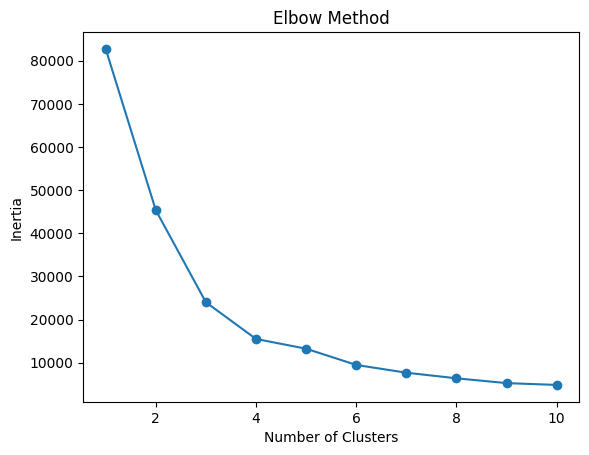

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list to store inertia values
inertias = []

# Define a range of cluster numbers
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(sample[cols])
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [84]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(sample[cols])

KMeans(n_clusters=4)

In [85]:
sample['group'] = kmeans.labels_

In [86]:
merged_df = sample.merge(player_mapping, on='id', how='left')

In [102]:
merged_df[['web_name', 'group', 'goals_scored','assists','total_points', 'influence', 'creativity', 'threat', 'ict_index']].to_csv('./fw_groups.csv')